<a href="https://colab.research.google.com/github/photonicray/qubitsmashers/blob/main/qubit_smashers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install QuantumRingsLib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 25.3 MB/s eta 0:00:00


Enter the number of bits (e.g., 8, 10, 12, ...): 200
Enter the number to factor (N): 98
Enter a value for 'a' (a < 98 and co-prime to 98): 89
Enter your Quantum Rings registered email: pernilalithpk@gmail.com
       ┌───┐ ╎                                     ╎ ┌───┐               »
q[0]: ■┤ H ├─╎─────────────────────────────────────╎─┤ H ├───────■───────»
       ├───┤ ╎                                     ╎ └───┘┌──────┴──────┐»
q[1]: ■┤ H ├─╎──────────────────■─────────■────────╎──────┤ U1(-pi/2)   ├»
       ├───┤ ╎                  │         │        ╎      └─────────────┘»
q[2]: ■┤ H ├─╎───■────■─────────│─────────│────────╎─────────────────────»
       └───┘ ╎   │    │       ┌─┴─┐       │        ╎                     »
q[3]: ■──────╎───│────│───────┤ X ├──■────│────────╎─────────────────────»
             ╎ ┌─┴─┐  │  ┌───┐└─┬─┘  │    │  ┌───┐ ╎                     »
q[4]: ■──────╎─┤ X ├──│──┤ X ├──│────│────■──┤ X ├─╎─────────────────────»
             ╎ └───┘┌─┴─┐└─┬─┘  │  ┌─┴─┐ 

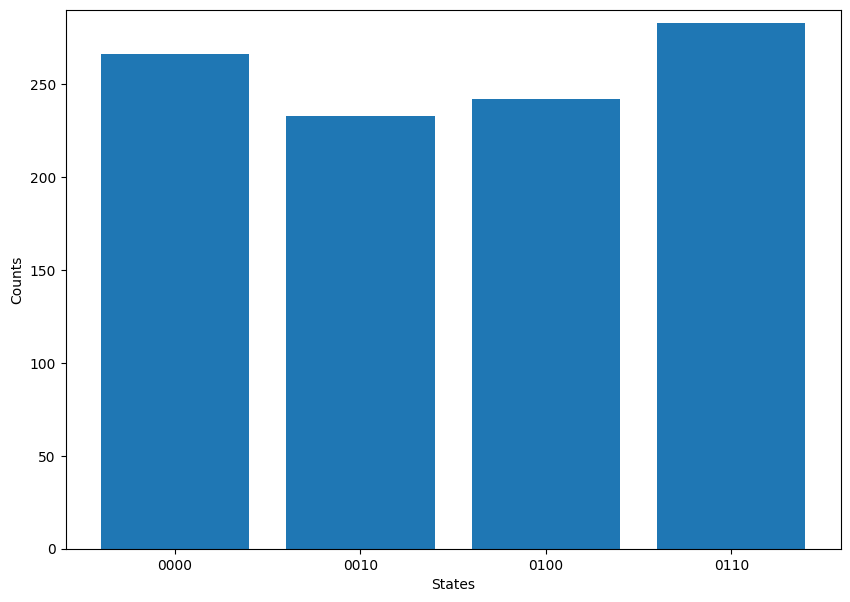

Factorization result for 98:
Measurement Results: {'0000': 266, '0010': 233, '0100': 242, '0110': 283}
Factors: 98 (Result should match expected values)
Quantum Rings Email: pernilalithpk@gmail.com


In [ ]:
import QuantumRingsLib
from QuantumRingsLib import QuantumRegister, ClassicalRegister, QuantumCircuit
from QuantumRingsLib import QuantumRingsProvider
from QuantumRingsLib import job_monitor
from matplotlib import pyplot as plt
import numpy as np
import math
import time

# Predefined semiprimes for different bit lengths
semiprimes = {
    8: 143,
    10: 899,
    12: 3127,
    14: 11009,
    16: 47053,
    18: 167659,
    20: 744647,
    22: 3036893,
    24: 11426971,
    26: 58949987,
    28: 208241207,
    30: 857830637,
    32: 2776108693,
    34: 11455067797,
    36: 52734393667,
    38: 171913873883,
    40: 862463409547,
    42: 2830354423669,
    44: 12942106192073,
    46: 53454475917779,
    48: 255975740711783,
    50: 696252032788709,
    52: 3622511636491483,
    54: 15631190744806271,
    56: 51326462028714137,
    58: 217320198167105543,
    60: 827414216976034907,
    62: 3594396771839811733,
    64: 13489534701147995111
    # Add more if needed
}

# Step 1: Get user input for the number of bits
bits = int(input("Enter the number of bits (e.g., 8, 10, 12, ...): "))

# Step 2: Select the semiprime based on bits
N = semiprimes.get(bits)
if N is None:
    N = int(input("Enter the number to factor (N): "))
else:
    print(f"Using predefined semiprime for {bits} bits: {N}")

# Step 3: Set your co-prime 'a' value
a = int(input(f"Enter a value for 'a' (a < {N} and co-prime to {N}): "))

# Step 4: Get the Quantum Rings email
email = input("Enter your Quantum Rings registered email: ")

# Function to perform Inverse Quantum Fourier Transform (IQFT)
def iqft_cct(qc, q, n):
    for i in range(n):
        for j in range(1, i + 1):
            qc.cu1(-math.pi / 2 ** (i - j + 1), q[j - 1], q[i])
        qc.h(q[i])
    qc.barrier()
    return

# Function to plot histogram
def plot_histogram(counts, title=""):
    fig, ax = plt.subplots(figsize=(10, 7))
    plt.xlabel("States")
    plt.ylabel("Counts")
    mylist = [key for key, val in counts.items() for _ in range(val)]
    unique, inverse = np.unique(mylist, return_inverse=True)
    bin_counts = np.bincount(inverse)
    plt.bar(unique, bin_counts)
    maxFreq = max(counts.values())
    plt.ylim(ymax=np.ceil(maxFreq / 10) * 10 if maxFreq % 10 else maxFreq + 10)
    plt.title(title)
    plt.show()

# Function to run Shor's algorithm
def run_shors_algorithm(N, a, shots=1024):
    provider = QuantumRingsProvider(token='rings-200.Mv42vGhGh2uSkhQiwHKdifTPlnGg4M05', name='pernilalithpk@gmail.com')
    backend = provider.get_backend("scarlet_quantum_rings")

    # Initialize quantum register and classical register
    numberofqubits = 7
    q = QuantumRegister(numberofqubits, 'q')
    c = ClassicalRegister(4, 'c')
    qc = QuantumCircuit(q, c)

    # Initialize quantum circuit
    qc.h(0)
    qc.h(1)
    qc.h(2)
    qc.x(6)
    qc.barrier()

    # Modular exponentiation (7^x mod 15)
    qc.cx(q[2], q[4])
    qc.cx(q[2], q[5])
    qc.cx(q[6], q[4])
    qc.ccx(q[1], q[5], q[3])
    qc.cx(q[3], q[5])
    qc.ccx(q[1], q[4], q[6])
    qc.cx(q[6], q[4])
    qc.barrier()

    # Apply IQFT
    iqft_cct(qc, q, 3)

    # Measure the quantum circuit
    qc.measure(q[0], c[0])
    qc.measure(q[1], c[1])
    qc.measure(q[2], c[2])

    # Draw the circuit
    qc.draw('mpl')

    # Execute the circuit on the quantum backend
    job = backend.run(qc, shots=shots)
    job_monitor(job)
    result = job.result()
    counts = result.get_counts()

    # Visualize the result
    plot_histogram(counts)

    # Clean up
    del q, c, qc
    del result
    del job

    # Display results
    print(f"Factorization result for {N}:")
    print(f"Measurement Results: {counts}")
    print(f"Factors: {N} (Result should match expected values)")
    print(f"Quantum Rings Email: {email}")

# Run the algorithm with the provided N and a
run_shors_algorithm(N, a)
